In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
scaler = StandardScaler()

In [6]:
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
pca = PCA(n_components=13)
pca_df = pca.fit_transform(scaled_df)
pca_df

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
        -4.20493905e-01,  5.52927766e-01, -3.02978176e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
        -1.30019629e-01,  3.94971160e-01, -1.46645308e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
        -2.79074108e-01,  1.89799314e-03,  2.12780166e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         5.02640272e-01,  6.93336340e-01,  1.67035660e-01],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.13785741e-01,  3.44119826e-01, -1.09514873e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -2.38282390e-01, -1.89866131e-01, -1.64090011e-01]])

In [8]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [9]:
var=pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458])

In [10]:
var1=np.cumsum(np.round(var,4)*100)
var1

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88, 93.98,
       95.85, 97.46, 98.67, 99.6 ])

Text(0.5, 1.0, 'Variance by each component')

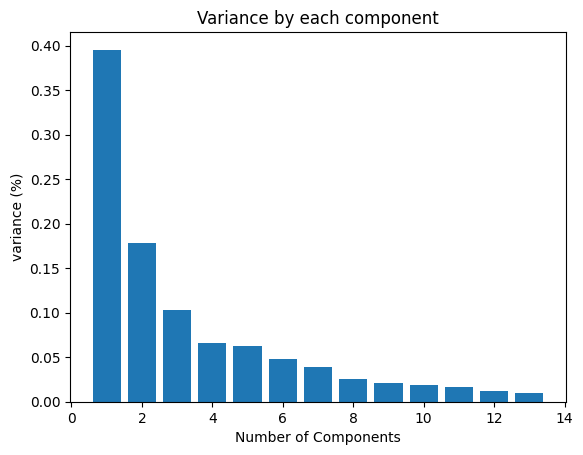

In [11]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Variance by each component')

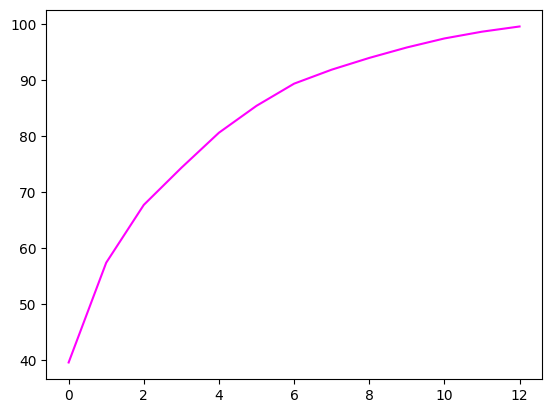

In [12]:
plt.plot(var1,color='magenta')

In [13]:
df2=pd.concat([df['Type'],pd.DataFrame(pca_df[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
df2

,Type,PC1,PC2,PC3
0,1,-3.522934,-1.453098,-0.164795
1,1,-2.528858,0.330019,-2.026707
2,1,-2.785029,-1.036936,0.983238
3,1,-3.922588,-2.768210,-0.174968
4,1,-1.407511,-0.867773,2.025829
...,...,...,...,...
173,3,3.627996,-2.206617,-0.343668
174,3,2.942729,-1.752263,0.207480
175,3,3.027272,-2.756040,-0.940803
176,3,2.755222,-2.293784,-0.550474


In [14]:
import seaborn as sns

<Axes: >

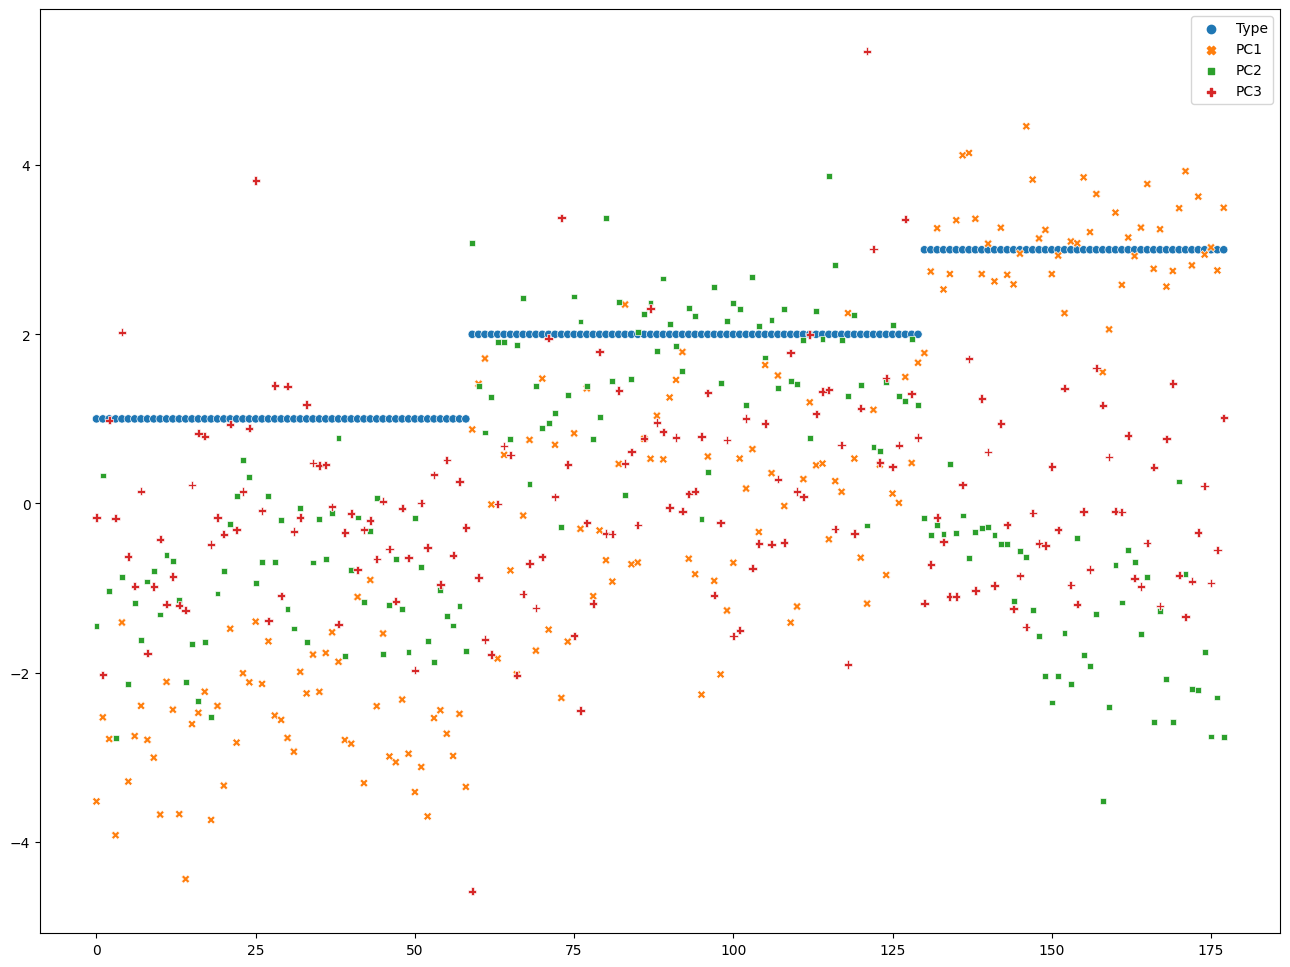

In [15]:
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=df2)

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)


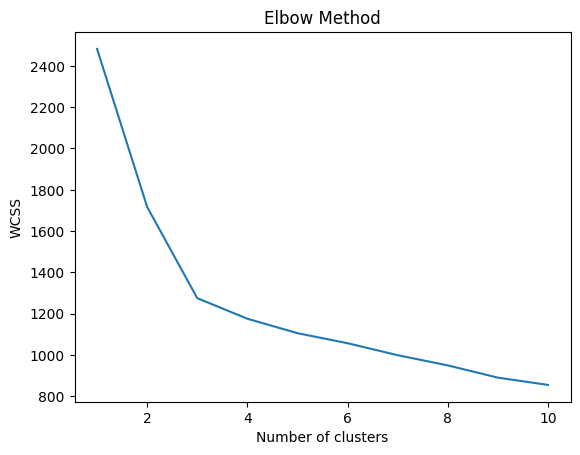

In [18]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

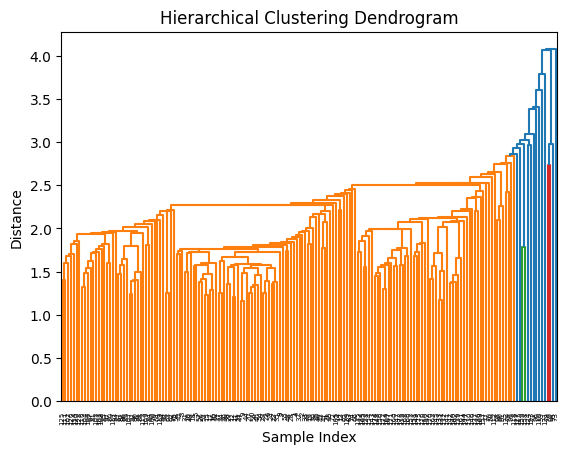

In [19]:
linked = linkage(pca_df, 'single')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

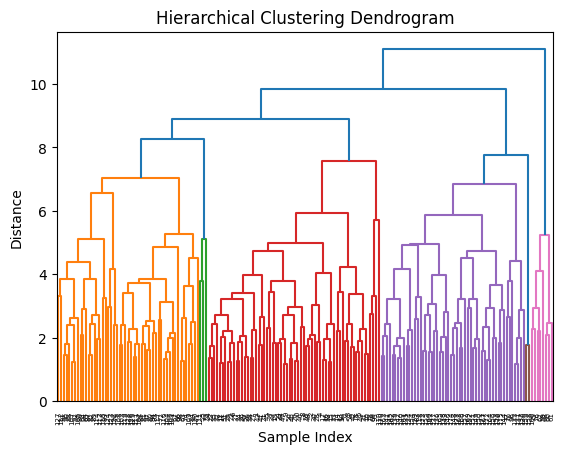

In [20]:
linked = linkage(pca_df, 'complete')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

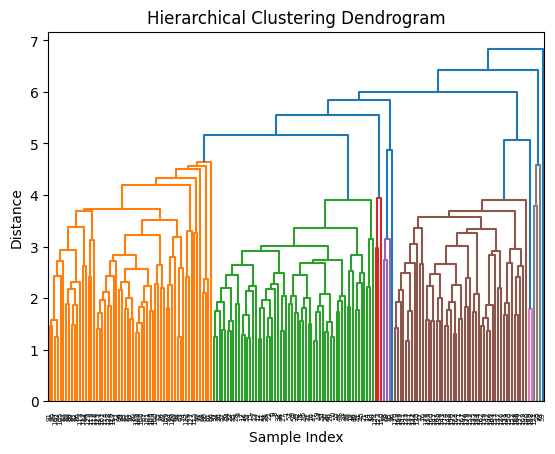

In [21]:
linked = linkage(pca_df, 'average')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

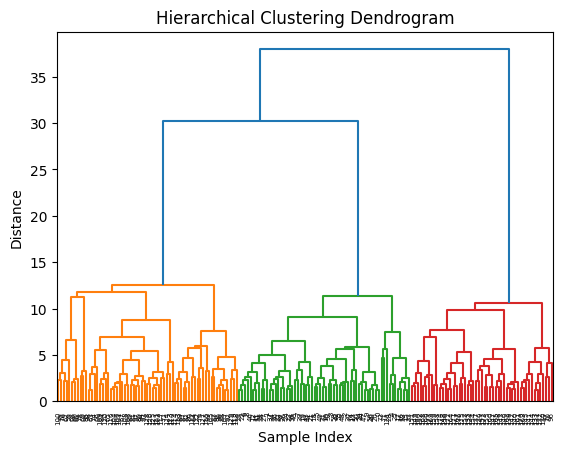

In [22]:
linked = linkage(pca_df, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [23]:
optimal_clusters = 3
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(pca_df)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [24]:
df['cluster_label'] = kmeans_optimal.labels_

In [25]:
print(df[['Type', 'cluster_label']])

     Type  cluster_label
0       1              2
1       1              2
2       1              2
3       1              2
4       1              2
..    ...            ...
173     3              1
174     3              1
175     3              1
176     3              1
177     3              1

[178 rows x 2 columns]


In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

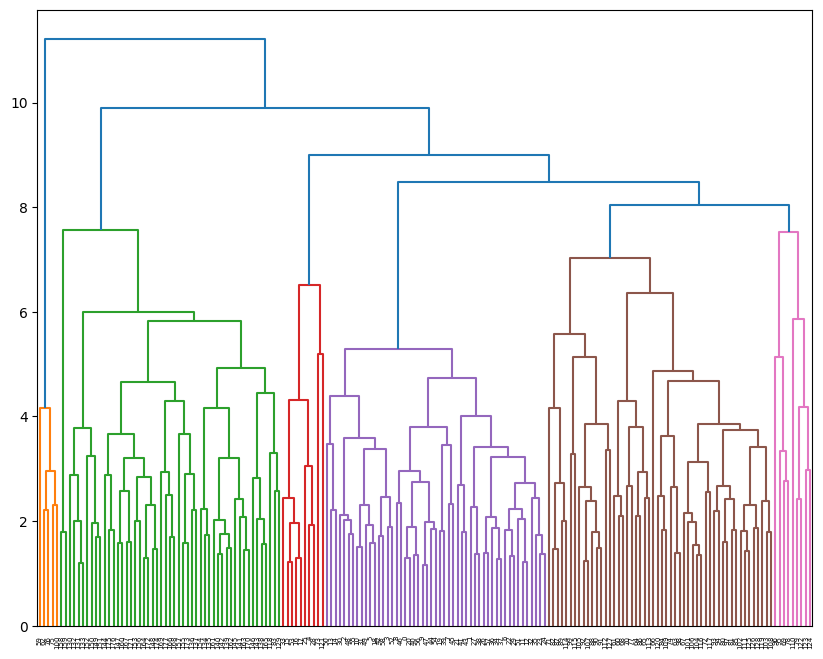

In [27]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(scaled_df,'complete'))

In [28]:
ac=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
ac

AgglomerativeClustering(affinity='euclidean', n_clusters=6)

In [29]:
y_pred = ac.fit_predict(df)
y_pred

array([3, 3, 3, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 5, 1, 1,
       3, 3, 5, 5, 3, 0, 5, 3, 0, 0, 3, 0, 3, 5, 5, 3, 3, 1, 1, 3, 3, 1,
       5, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 2, 1, 2, 1, 4, 4, 1,
       2, 2, 1, 1, 5, 4, 2, 3, 5, 4, 4, 2, 1, 2, 4, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 4, 4, 3, 1, 4, 1, 4, 1, 2, 4, 4, 1, 4, 2, 2, 4, 1,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 1, 2, 4, 4, 4, 4, 4, 2, 4, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 5, 5, 4, 1, 1, 2, 2, 2, 4, 1,
       1, 1, 2, 5, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 5,
       5, 2], dtype=int64)

In [30]:
df['cluster labels']= y_pred
df[['Type','cluster labels']]

,Type,cluster labels
0,1,3
1,1,3
2,1,3
3,1,0
4,1,1
...,...,...
173,3,1
174,3,1
175,3,5
176,3,5


<Axes: xlabel='cluster labels', ylabel='Alcohol'>

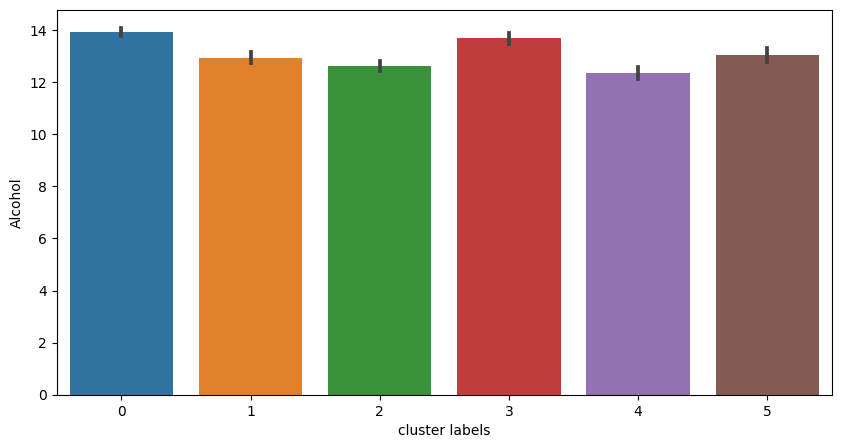

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x='cluster labels', y='Alcohol', data=df)